In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Define the ticker symbols for assets in the portfolio
ticker_symbols = [ 'TSLA', 'AAPL', 'MSFT', 'PFE']

# Fetch historical stock data using yfinance
stock_data = yf.download(ticker_symbols, start='2020-01-01', end='2024-03-31')

# Calculate daily returns for each asset
daily_returns = stock_data['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  4 of 4 completed


In [30]:
# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Define risk-free rate (e.g., 10-year Treasury yield)
risk_free_rate = 0.04  # Example risk-free rate as decimal

# Initialize lists to store portfolio statistics
portfolios = []


In [31]:
# Calculate efficient frontier
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(ticker_symbols))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = portfolio_sharpe_ratio


In [32]:
# Convert results to DataFrame
results_df = pd.DataFrame(results.T, columns=['Return', 'Standard Deviation', 'Sharpe Ratio'])

# Calculate optimal portfolios (tangency portfolio)
optimal_portfolio_indices = results_df['Sharpe Ratio'].idxmax()
optimal_portfolio_return = results_df.loc[optimal_portfolio_indices, 'Return']
optimal_portfolio_std_dev = results_df.loc[optimal_portfolio_indices, 'Standard Deviation']


In [33]:
optimal_portfolio_indices

161

In [34]:
optimal_portfolio_return

0.4622848047189314

In [36]:
optimal_portfolio_std_dev

0.4252762240381824

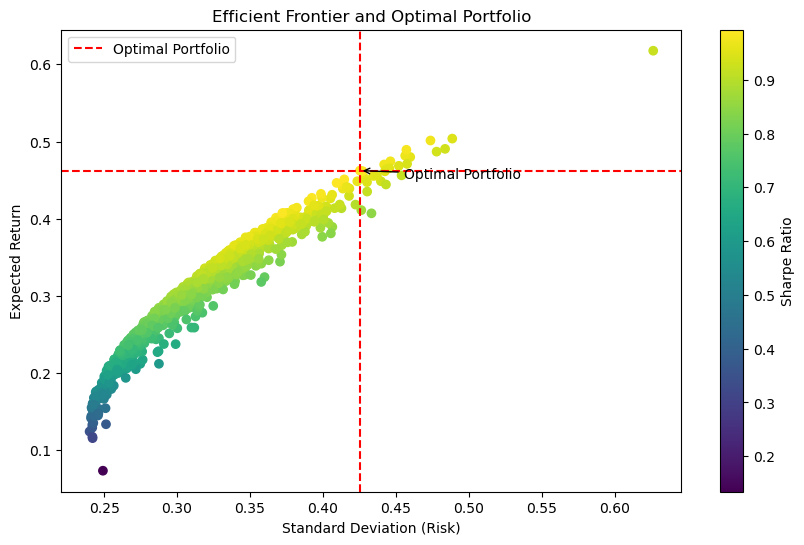

In [35]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the efficient frontier
ax.scatter(results_df['Standard Deviation'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
ax.set_title('Efficient Frontier and Optimal Portfolio')
ax.set_xlabel('Standard Deviation (Risk)')
ax.set_ylabel('Expected Return')

# Plot the optimal portfolio
ax.axhline(y=optimal_portfolio_return, color='r', linestyle='--', label='Optimal Portfolio')
ax.axvline(x=optimal_portfolio_std_dev, color='r', linestyle='--')
ax.annotate('Optimal Portfolio', xy=(optimal_portfolio_std_dev, optimal_portfolio_return),
            xytext=(optimal_portfolio_std_dev + 0.03, optimal_portfolio_return - 0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )

# Add colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Sharpe Ratio')

# Show legend
ax.legend()

plt.show()